In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv ("/content/drive/My Drive/master_dataset/extracted_features.csv")

In [ ]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,4612,4613,4614,4615,4616,4617,4618,4619,4620,4621
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,...,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,0.252976,0.253850,0.254146,0.254460,0.254539,0.255001,0.255291,0.255618,0.255678,0.256142,...,-0.361113,-0.363039,-0.368366,-0.371656,-0.376130,-0.376736,-0.372115,-0.370660,-0.365544,0.399336
std,0.109494,0.109618,0.109508,0.109402,0.109509,0.109268,0.109152,0.109044,0.109114,0.108848,...,0.551732,0.551547,0.556399,0.564214,0.569144,0.571363,0.567235,0.567022,0.563397,0.490033
min,0.021222,0.021250,0.021306,0.021326,0.021479,0.021514,0.021563,0.021578,0.021307,0.021469,...,-2.611010,-2.730420,-2.657370,-2.692930,-2.531020,-2.711810,-2.776420,-2.809960,-2.895980,0.000000
25%,0.153440,0.154344,0.154596,0.155304,0.155442,0.156120,0.156467,0.156639,0.157282,0.158864,...,-0.721745,-0.727030,-0.737455,-0.742970,-0.751130,-0.748605,-0.747535,-0.723688,-0.727270,0.000000
50%,0.277024,0.278037,0.277780,0.277711,0.278060,0.278025,0.279073,0.278999,0.279404,0.279439,...,-0.345720,-0.352620,-0.360915,-0.359960,-0.358970,-0.356630,-0.361950,-0.361945,-0.351710,0.000000
75%,0.334548,0.335225,0.334734,0.335228,0.335654,0.335432,0.336029,0.336320,0.336740,0.337070,...,0.006567,0.005358,0.017273,0.028522,0.008165,0.012490,0.017195,0.000063,0.003023,1.000000
max,0.533359,0.534139,0.535233,0.536544,0.537668,0.538444,0.539243,0.539599,0.539413,0.539621,...,1.626480,1.607370,1.726360,1.774620,1.750620,1.773920,1.680630,1.673320,1.498440,1.000000


In [ ]:
X , Y = data.values [ : , : -1 ] , data.values [ : , -1 ]

In [ ]:
print ( "classes are : " , np.unique ( Y ) )


classes are :  [0. 1.]


In [ ]:
X.shape

(904, 4620)

In [ ]:
Y.shape

(904,)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y , test_size = 0.3 , random_state = 7)

In [ ]:
X_train

array([[ 0.25000036,  0.25124519,  0.25159178, ..., -0.22544   ,
        -0.20762   , -0.19633   ],
       [ 0.12661237,  0.12668899,  0.12773296, ..., -0.11575   ,
        -0.11857   , -0.09673   ],
       [ 0.26256645,  0.2612467 ,  0.26092251, ..., -0.66835   ,
        -0.64648   , -0.56575   ],
       ...,
       [ 0.33938133,  0.33893122,  0.3393757 , ..., -0.38246   ,
        -0.36795   , -0.30057   ],
       [ 0.35476254,  0.35532313,  0.35719844, ..., -0.21354   ,
        -0.12356   , -0.05735   ],
       [ 0.35891821,  0.35962597,  0.3595616 , ..., -0.59564   ,
        -0.65448   , -0.72532   ]])

In [ ]:
X_test

array([[ 0.17352835,  0.17336474,  0.17380241, ..., -0.1387    ,
        -0.1563    , -0.22984   ],
       [ 0.07983144,  0.07993921,  0.07997144, ..., -0.093     ,
        -0.1716    , -0.20171   ],
       [ 0.34434355,  0.34401819,  0.3437729 , ..., -0.46561   ,
        -0.43507   , -0.43249   ],
       ...,
       [ 0.37341267,  0.37306699,  0.37429125, ..., -0.91708   ,
        -1.11263   , -1.09285   ],
       [ 0.45509412,  0.45591108,  0.45589959, ..., -0.49271   ,
        -0.46354   , -0.43804   ],
       [ 0.43551176,  0.43598961,  0.43677587, ..., -1.01453   ,
        -1.08037   , -1.05803   ]])

In [ ]:
# model = RandomForestClassifier( n_estimators=100 , random_state = 7 )
model=KNeighborsClassifier(n_neighbors=7)

In [ ]:
model.fit(X_train,Y_train)
# cm = confusion_matrix(Y_test,cf.predict(X_test))
# sns.heatmap(cm,annot=True,fmt="d")

KNeighborsClassifier(n_neighbors=7)

In [ ]:
print ("baseline accuracy " , (  (model.predict(X_test) == Y_test).astype("int8").sum() / Y_test.shape[0]   ) )

baseline accuracy  0.75


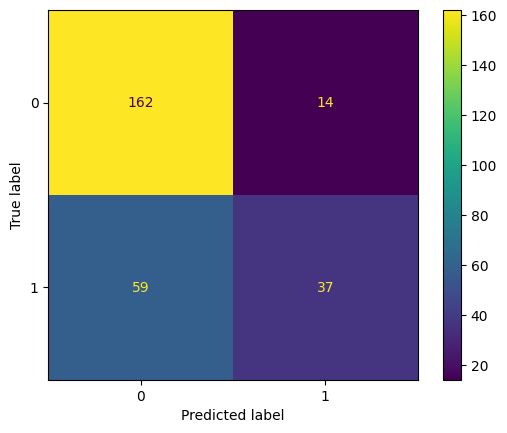

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix = confusion_matrix(Y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
print("Sensitivity:",a[0][0]/(a[0][0]+a[0][1]))

Sensitivity: 0.9204545454545454


In [ ]:
print("Specificty:", a[1][1]/(a[1][1]+a[1][0]))

Specificty: 0.3854166666666667


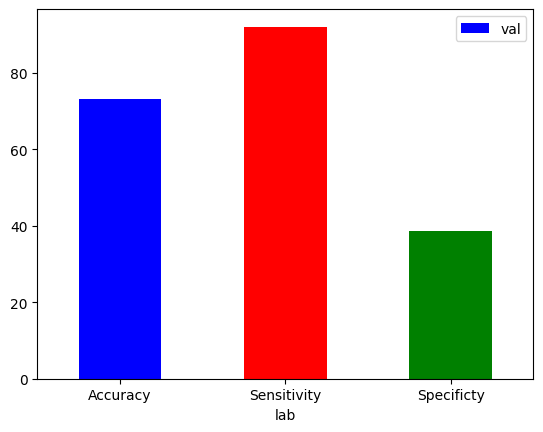

In [ ]:
df = pd.DataFrame({'lab':['Accuracy', 'Sensitivity', 'Specificty'], 'val':[73.1,92,38.5]}) #RF
ax = df.plot.bar(x='lab', y='val', rot=0,color=['b', 'r', 'g'])